# CPSC 330 - Applied Machine Learning 
## Homework 6: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, November 15, 2021 at 11:59pm**

## Table of contents

- [Submission instructions](#si)
- [Understanding the problem](#1)
- [Data splitting](#2)
- [EDA](#3)
- (Optional) [Feature engineering](#4)
- [Preprocessing and transformations](#5)
- [Baseline model](#6)
- [Linear models](#7)
- [Different classifiers](#8)
- (Optional) [Feature selection](#9)
- [Hyperparameter optimization](#10)
- [Interpretation and feature importances](#11)
- [Results on the test set](#12)
- (Optional) [Explaining predictions](#13)
- [Summary of the results](#14)

## Imports 

In [47]:
import os

%matplotlib inline
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
import lightgbm as lgb
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    plot_confusion_matrix,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC

<br><br>

## Instructions 
<hr>
rubric={points:2}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md). 

**You may work on this homework in a group and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br>

## Introduction <a name="in"></a>
<hr>

At this point we are at the end of supervised machine learning part of the course. So in this homework, you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips

1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 
4. If you are having trouble running models on your laptop because of the size of the dataset, you can create your train/test split in such a way that you have less data in the train split. If you end up doing this, please write a note to the grader in the submission explaining why you are doing it.  

#### Assessment

We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.

#### A final note

Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (4-10 hours) is a good guideline for a typical submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

## 1. Understanding the problem <a name="1"></a>
<hr>
rubric={points:4}

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

In [4]:
df = pd.read_csv("UCI_Credit_Card.csv", encoding="utf-8")

This is a data set with data about customers and their credit card habits. It will be interesting to see what factors affect credit card defaulting the most.

<br><br>

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train and test portions. 

In [5]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=123)
train_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
16395,16396,320000.0,2,1,2,36,0,0,0,0,...,19370.0,10155.0,3788.0,5000.0,5018.0,1000.0,3000.0,0.0,7013.0,0
21448,21449,440000.0,2,1,2,30,-1,-1,-1,0,...,171244.0,150897.0,117870.0,612.0,87426.0,130007.0,3018.0,15000.0,51663.0,0
20034,20035,160000.0,2,3,1,44,-2,-2,-2,-2,...,-18.0,-18.0,-18.0,0.0,0.0,0.0,0.0,0.0,0.0,0
25755,25756,120000.0,2,2,1,30,0,0,0,0,...,103058.0,71095.0,47379.0,3706.0,5502.0,4204.0,3017.0,2005.0,1702.0,0
1438,1439,50000.0,1,2,2,54,1,2,0,0,...,27585.0,27910.0,27380.0,0.0,1400.0,1200.0,1500.0,1000.0,1500.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28636,28637,380000.0,2,2,1,37,0,0,0,0,...,14291.0,15949.0,15556.0,1204.0,1300.0,1242.0,1900.0,0.0,3000.0,0
17730,17731,360000.0,2,1,1,54,1,-2,-2,-1,...,2580.0,2580.0,6941.0,0.0,0.0,2580.0,0.0,6941.0,0.0,0
28030,28031,50000.0,2,3,1,29,0,0,0,0,...,39420.0,8824.0,9009.0,2002.0,2000.0,1530.0,1000.0,327.0,329.0,1
15725,15726,30000.0,2,2,2,21,0,0,0,0,...,30841.0,29434.0,16565.0,2000.0,2000.0,2000.0,1765.0,331.0,0.0,0


<br><br>

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21000 entries, 16395 to 19966
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                  

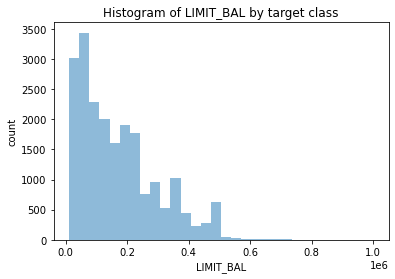

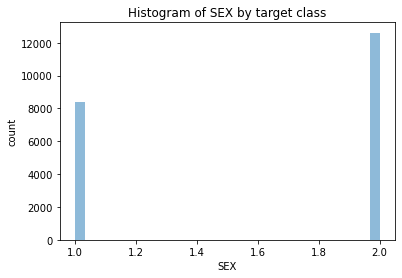

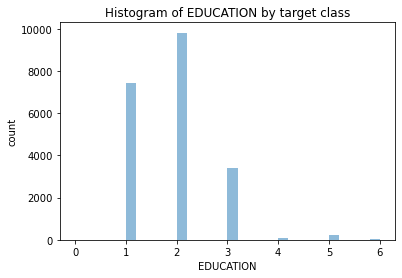

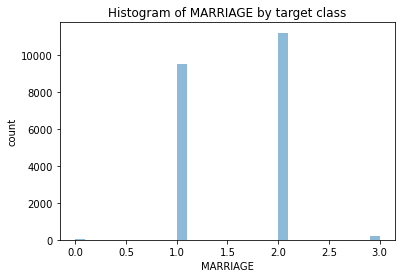

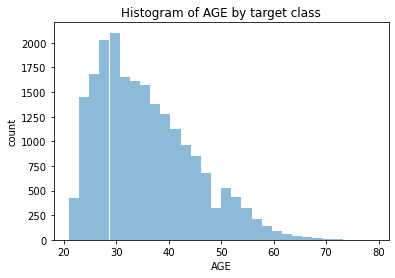

In [9]:
train_df.info()
train_df.sort_index()
num_cats = ["LIMIT_BAL","SEX","EDUCATION","MARRIAGE","AGE"]
for column in num_cats:
    title = "Histogram of " + column + " by target class"
    train_df[column].plot(kind='hist', alpha=0.5, bins=30)
    plt.title(title)
    plt.xlabel(column)
    plt.ylabel("count")
    plt.show()


In [16]:
X_train, y_train = (
    train_df.drop(columns=["default.payment.next.month"]),
    train_df["default.payment.next.month"],
)
X_test, y_test = (
    test_df.drop(columns=["default.payment.next.month"]),
    test_df["default.payment.next.month"],
)



In [62]:
print(
    "Fraction that default:\n",
    train_df["default.payment.next.month"].value_counts(normalize=True),
)

Fraction that default:
 0    0.776762
1    0.223238
Name: default.payment.next.month, dtype: float64


In [61]:
from sklearn.metrics import f1_score, make_scorer, recall_score

custom_scorer = make_scorer(f1_score, average="macro")
scoring_metric = custom_scorer

From here we see that all our feature values are numerical in value. I will omit the id, pay columns, bill amount columns and pay_amt columns for now and visualize the rest in histograms. Some of our features are also categorical such as sex, marriage and education so we will need transformations later. Both our AGE and LIMIT_BAL are right skewed with our values mostly being on the left. We will use macro-f1 as our scoring because we have class imbalance so accuracy will not be as telling of an indicator.

<br><br>

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<br><br>

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

 1   LIMIT_BAL: scaling              
 2   SEX: ohe                         
 3   EDUCATION: OHE there is already ordinality in original data                    
 4   MARRIAGE: ohe                  
 5   AGE: scaling

In [11]:
numeric_features = [
    "LIMIT_BAL",
    "PAY_0",
    "PAY_2",
    "PAY_3",
    "PAY_4",
    "PAY_5",
    "PAY_6",
    "BILL_AMT1",
    "BILL_AMT2",
    "BILL_AMT3",
    "BILL_AMT4",
    "BILL_AMT5",
    "BILL_AMT6",
    "PAY_AMT1",
    "PAY_AMT2",
    "PAY_AMT3",
    "PAY_AMT4",
    "PAY_AMT5",
    "PAY_AMT6",
    "AGE",
]
categorical_features = ["MARRIAGE","EDUCATION"]
binary_features = ["SEX"]
drop_features = ["ID"]
passthrough_features = []
target = "default.payment.next.month"

In [12]:
preprocessor = make_column_transformer(
    ("drop", drop_features),
    (StandardScaler(),numeric_features),
    (OneHotEncoder(drop="if_binary"), binary_features),
    (OneHotEncoder(handle_unknown="ignore"), categorical_features),
)
results = {}

<br><br>

## 6. Baseline model <a name="6"></a>
<hr>

rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

In [64]:
pipe_lr = make_pipeline(
    preprocessor, DummyClassifier(strategy="stratified")
)
results["dummy"] = cross_validate(
    pipe_lr, X_train, y_train, return_train_score=True, scoring = custom_scorer 
)
pd.DataFrame(results["dummy"])

,fit_time,score_time,test_score,train_score
0,0.041005,0.018002,0.498289,0.504337
1,0.041959,0.017990,0.507400,0.492925
2,0.066002,0.016993,0.514027,0.508731
3,0.036005,0.016058,0.503232,0.500657
4,0.037086,0.017970,0.500127,0.498598


<br><br>

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:12}

**Your tasks:**

1. Try logistic regression as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter `C`. 
3. Report validation scores along with standard deviation. 
4. Summarize your results.

In [63]:
pipe_lr = make_pipeline(
    preprocessor, LogisticRegression(max_iter=1000, class_weight="balanced")
)
results["logreg"] = cross_validate(
    pipe_lr, X_train, y_train, return_train_score=True, scoring = custom_scorer 
)
pd.DataFrame(results["logreg"])

,fit_time,score_time,test_score,train_score
0,0.660994,0.022997,0.615845,0.626924
1,0.750997,0.016991,0.621635,0.629409
2,0.795013,0.018989,0.628525,0.626176
3,0.554999,0.018997,0.628419,0.623648
4,0.800006,0.035996,0.630111,0.631221


In [ ]:
param_grid = {
    "logisticregression__C": 2.0 ** np.arange(-5, 5),
    "logisticregression__class_weight": [None, "balanced"],
}
grid = GridSearchCV(
    pipe_lr,
    param_grid,
    verbose=1,
    n_jobs=-1,
    return_train_score=True,
    scoring = custom_scorer,
)
grid.fit(X_train, y_train);
grid_df = pd.DataFrame(grid.cv_results_)[
    [
        "mean_test_score",
        "mean_train_score",
        "param_logisticregression__C",
        "param_logisticregression__class_weight",
        "rank_test_score",
    ]
]
grid_df = grid_df.sort_values(by="mean_test_score", ascending=False)
grid_df

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [65]:
pipe_lr2 = make_pipeline(
    preprocessor, LogisticRegression(max_iter=1000, class_weight="balanced",C = 0.03125)
)
results["logreg (tuned)"] = cross_validate(
    pipe_lr2, X_train, y_train, return_train_score=True, scoring = custom_scorer 
)
mean_scores = pd.DataFrame(results["logreg (tuned)"]).mean()
std_scores = pd.DataFrame(results["logreg (tuned)"]).std()
pd.DataFrame(results["logreg (tuned)"])
print( std_scores)
print(mean_scores)
print(pd.DataFrame(results["logreg (tuned)"]))

ERROR! Session/line number was not unique in database. History logging moved to new session 14
fit_time       0.042134
score_time     0.006967
test_score     0.006161
train_score    0.003041
dtype: float64
fit_time       0.287327
score_time     0.021993
test_score     0.627602
train_score    0.629873
dtype: float64
   fit_time  score_time  test_score  train_score
0  0.330006    0.019991    0.618541     0.629603
1  0.264014    0.015989    0.623828     0.631320
2  0.334813    0.020994    0.632352     0.628321
3  0.242800    0.018993    0.631260     0.626040
4  0.265002    0.033998    0.632027     0.634083


Our test and train scores are better than DummyClassifier model by around 0.12, which means the logistic regression model is better but there may be better models that we can use. Using optimized hyperparameters also helped the scores improve marginally. Ww may be underfitting as there is not much difference between train and test scores.

<br><br>

## 8. Different classifiers <a name="8"></a>
<hr>
rubric={points:15}

**Your tasks:**
1. Try at least 3 other models aside from logistic regression. At least one of these models should be a tree-based ensemble model (e.g., lgbm, random forest, xgboost). 
2. Summarize your results. Can you beat logistic regression? 

In [52]:


models = {
    "Ridge": Ridge(),
    "Random Forest": RandomForestClassifier(),
    "LGBM": lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
}


In [66]:

for model in models:
    pipe = make_pipeline(preprocessor, models[model])
    results[model] = pd.DataFrame(cross_validate(pipe, X_train, y_train, return_train_score=True, scoring = custom_scorer )).mean()
    
pd.DataFrame(results)

C:\Users\willi\miniconda3\envs\cpsc330\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\willi\miniconda3\envs\cpsc330\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\willi\miniconda3\envs\cpsc330\lib\site-packages\sklearn\metrics\_scorer.py", line 216, in __call__
    return self._score(
  File "C:\Users\willi\miniconda3\envs\cpsc330\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\willi\miniconda3\envs\cpsc330\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\willi\miniconda3\envs\cpsc330\lib\site-packages\sklearn\metrics\_classification

,Ridge,Random Forest,logreg,logreg (tuned),LGBM,dummy
fit_time,0.073601,6.515924,"[0.6609938144683838, 0.7509973049163818, 0.795...","[0.33000636100769043, 0.26401400566101074, 0.3...",0.546242,"[0.04100489616394043, 0.04195880889892578, 0.0..."
score_time,0.022609,0.194511,"[0.022997379302978516, 0.01699090003967285, 0....","[0.01999068260192871, 0.015989303588867188, 0....",0.035114,"[0.018001556396484375, 0.017989635467529297, 0..."
test_score,NaN,0.681940,"[0.6158453731694608, 0.6216349263590519, 0.628...","[0.6185414311057977, 0.6238284121538838, 0.632...",0.684933,"[0.4982889923477956, 0.5073998289432373, 0.514..."
train_score,NaN,0.999142,"[0.6269241318547615, 0.6294089962807825, 0.626...","[0.6296032432901842, 0.6313197385583444, 0.628...",0.738843,"[0.504337438109785, 0.49292482044606395, 0.508..."


From our results we can see that Random Forest and LGBM perform the best out of our models but our Random Forest Model may be overfitted as our train_score is a lot higher than our test_score.

<br><br>

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:1}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<br><br>

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:15}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. You may pick one of the best performing models from the previous exercise and tune hyperparameters only for that model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

I will pick LGBM as my best performing model to perform hyperparameter optimization on. 

In [67]:
pipe_lgbm = make_pipeline(
    preprocessor, lgb.LGBMClassifier(learning_rate=0.09,max_depth=-5,random_state=42)
)

param_grid = {
    "lgbmclassifier__num_leaves": [7, 14, 21, ],
    "lgbmclassifier__learning_rate": [0.1, 0.03],
    "lgbmclassifier__max_depth": [-5,-1, 5],
    "lgbmclassifier__n_estimators": [50, 100, 500],
}
grid = GridSearchCV(
    pipe_lgbm,
    param_grid,
    verbose=1,
    n_jobs=-1,
    return_train_score=True,
    scoring = custom_scorer,
)
grid.fit(X_train, y_train);
grid_df = pd.DataFrame(grid.cv_results_)[
    [
        "mean_train_score",
        "mean_test_score",
        "param_lgbmclassifier__n_estimators",
        "param_lgbmclassifier__learning_rate",
        "param_lgbmclassifier__num_leaves",
        "param_lgbmclassifier__max_depth",
        "mean_fit_time",
        "rank_test_score",
    ]
]
grid_df = grid_df.sort_values(by="mean_test_score", ascending=False)
grid_df

Fitting 5 folds for each of 54 candidates, totalling 270 fits


,mean_train_score,mean_test_score,param_lgbmclassifier__n_estimators,param_lgbmclassifier__learning_rate,param_lgbmclassifier__num_leaves,param_lgbmclassifier__max_depth,mean_fit_time,rank_test_score
33,0.700390,0.687356,500,0.03,7,-5,3.169050,1
42,0.700390,0.687356,500,0.03,7,-1,3.131531,1
12,0.694725,0.686947,100,0.1,7,-1,1.129297,3
3,0.694725,0.686947,100,0.1,7,-5,1.123234,3
21,0.695621,0.686816,100,0.1,7,5,1.098557,5
51,0.699790,0.686545,500,0.03,7,5,3.212270,6
14,0.723363,0.686452,100,0.1,21,-1,1.466649,7
5,0.723363,0.686452,100,0.1,21,-5,1.440759,7
2,0.706182,0.685802,50,0.1,21,-5,1.026436,9
11,0.706182,0.685802,50,0.1,21,-1,0.998854,9


<br><br>

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:15}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to explain feature importances of one of the best performing models. Summarize your observations. 

In [72]:
import eli5

In [73]:
best_lgbm_model = grid.best_estimator_


In [74]:


binary_OHE = list(
    best_lgbm_model.named_steps["columntransformer"]
    .named_transformers_["onehotencoder-1"]
    .get_feature_names(binary_features)
)

categorical_OHE = list(
    best_lgbm_model.named_steps["columntransformer"]
    .named_transformers_["onehotencoder-2"]
    .get_feature_names(categorical_features)
)

feature_names = numeric_features + binary_OHE + categorical_OHE

eli5.show_weights(
    best_lgbm_model.named_steps["lgbmclassifier"],
    feature_names=feature_names,
)

C:\Users\willi\miniconda3\envs\cpsc330\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Weight,Feature
0.5559,PAY_0
0.0628,PAY_2
0.0374,PAY_3
0.0324,LIMIT_BAL
0.0320,BILL_AMT1
0.0297,PAY_AMT2
0.0293,PAY_6
0.0291,PAY_AMT3
0.0269,PAY_AMT1
0.0250,PAY_5


From our eli5, we can see that our most important features are the PAY, BILL_AMT, PAY_AMT columns with PAY_0 being our most important feature. This makes sense intuitively because whether or not a person pays in the first month could tell a lot about coming months. EDUCATION does not play as big of a role as I had suspected but this could be due to unknowns in the data in this column.

<br><br>

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:5}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 

TypeError: score() got an unexpected keyword argument 'scoring'

In [86]:
from sklearn.metrics import f1_score

predictions = best_lgbm_model.predict(X_test)
print(
    "Macro-average f1 score on the test set: %0.3f"
    % (f1_score(y_test, predictions, average="macro"))
)

Macro-average f1 score on the test set: 0.685


Our train_score on our test set is very similar to our f1 scores from before. This is an indicator that we are not having issues with optimization bias. 

<br><br>

## (Optional) 13. Explaining predictions 
rubric={points:1}

**Your tasks**

1. Take one or two test predictions and explain them with SHAP force plots.  

<br><br>

## 14. Summary of results <a name="13"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Report your final test score along with the metric you used. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 

The final test score from applying the LGBM model with optimized hyperparameter is 0.685. This score is a Macro-average f1 score. I used the macro-average f1 score because there is class imbalance between defaulting payments and not defaulting payments. All our models performed better than our baseline DummyClassifier. RandomForest and LGBM performed similarly however it was found that RandomForest was likely to be overfitted as it had a high train_score compared to test_score when cross validating. This is why I used the LGBM model. 

<br><br><br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 